# AIML Assignment 1: Housing dataset (Regression)
- Name: Ashley Bai
- Admin Number: P2237871
- Class: DAAA/FT/2A/04

# Background
- This is a dataset <b>to predict the housing price in US</b> based on various factors such as 
city, house area, No. of bedrooms and toilets, renovation status, etc. 
    
    - <b>Target variable: Price</b>
    
# Table of Contents
1. Background/Introduction
2. Explanatory Data Analysis (EDA)
3. Data Pre-Processing
4. Feature Engineering
5. Data Visualization
6. Building Regression Models
7. Evaluating Model Performances and choosing best model
8. Model improvement by GridSearchCV and tuning hyperparameters to yield best results
9. Use the finalised model on testing data
10. Conclusion

<h1><center>Explanatory Data Analysis (EDA): Explore <b>Raw</b> Dataset</center></h1>


<h3>Import libraries/modules</h3>

In [4]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Load the "housing_dataset.csv" dataset</h3>

In [5]:
# load dataset
housing_df = pd.read_csv("C:\YEAR 2 SEM 1\DAAAAIML\DAAAAIML_CA1\ST1511 AIML-CA1-datasets\housing_dataset.csv")

<h3>Explore the RAW dataset (general overview of how df looks like)</h3>

In [6]:
# display first few rows of df: general overview of df
housing_df.head(5)

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


- Dataset contains a mix of categorical and numerical variables.
- Categorical variables: City, Renovation Status.

<h3>Check the shape of df</h3>

In [7]:
# number of rows and columns in df
housing_df.shape

(545, 8)

- There are 545 rows and 8 columns in the original housing df.

<h3>Check data types of variables in df (especially existence of categorical variables)</h3>

In [8]:
# display data types and number of null values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


- All variables in housing_df are numerical except for 'City' and 'Renovation Status'.

<h3>Check columns in df</h3>

In [9]:
# columns in df
housing_df.columns

Index(['House ID', 'City', 'House Area (sqm)', 'No. of Bedrooms',
       'No. of Toilets', 'Stories', 'Renovation Status', 'Price ($)'],
      dtype='object')

<h3>Check values in categorical columns</h3>

In [10]:
# values in columns in df (categorical variables)
print(housing_df['City'].value_counts(), '\n')
print(housing_df['Renovation Status'].value_counts())

New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
Name: City, dtype: int64 

semi-furnished    227
unfurnished       178
furnished         140
Name: Renovation Status, dtype: int64


<h3>Check for existence of duplicates in df</h3>

In [11]:
# check for duplicated values/rows
print(housing_df.duplicated())
print('\n')

# count the number of duplicated rows
duplicated_rows = housing_df.duplicated().sum()

# display the number of duplicated rows
print('Number of duplicated rows: ', duplicated_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool


Number of duplicated rows:  0


- There are no duplicated rows in the housing dataframe.

<h3>Check for existence of outliers in df (numerical columns)</h3>

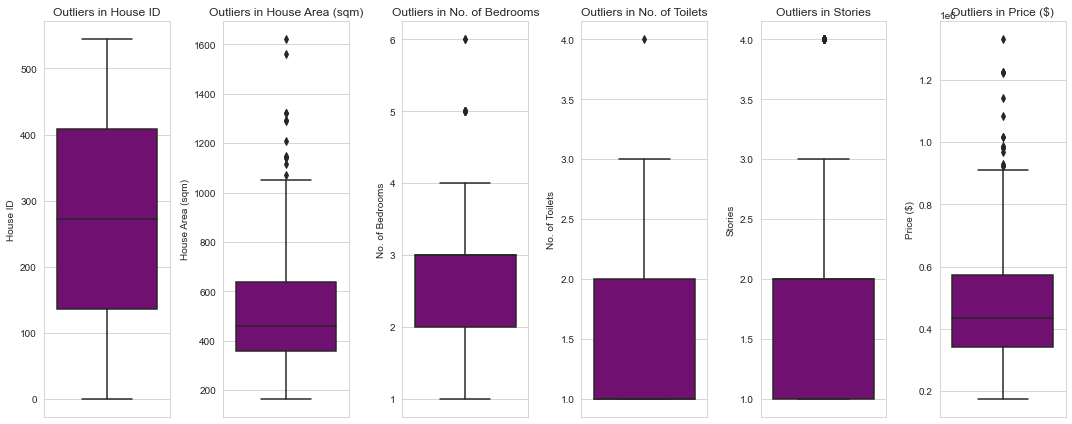

In [12]:
# check for outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# extract numerical columns in df
numerical_cols = housing_df.select_dtypes(include=np.number).columns

# create and set figure size
plt.figure(figsize=(15,6))

for col in numerical_cols:
    # subplots
    plt.subplot(1, len(numerical_cols), list(numerical_cols).index(col) + 1)
    # plot boxplot
    sns.boxplot(data=housing_df, y=col, color='purple')
    # graph labels, title
    plt.title(f'Outliers in {col}')
    
# spacing between subplots
plt.tight_layout() 
# display graphs
plt.show()  

- There are presence of outliers in almost all numerical columns in df.

<h3>Check for existence of missing values in df</h3>

In [13]:
# check for missing values
# returns True if there are missing/null values
print(housing_df.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(housing_df.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(housing_df.isnull().sum(), "\n")

False 

0 

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64 



- There are no missing values in housing dataframe.

<h3>Summary statistics of numerical features in df</h3>

In [14]:
# display summary statistics of numerical features
housing_df.describe().round()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,272.0,515.0,3.0,1.0,2.0,476673.0
std,157.0,217.0,1.0,1.0,1.0,187044.0
min,0.0,165.0,1.0,1.0,1.0,175000.0
25%,136.0,360.0,2.0,1.0,1.0,343000.0
50%,272.0,460.0,3.0,1.0,2.0,434000.0
75%,408.0,636.0,3.0,2.0,2.0,574000.0
max,544.0,1620.0,6.0,4.0,4.0,1330000.0


- There are 545 distinct houses.
- The mean size of houses is 515sqm, with mean price of $476,673.
- Generally, every house has 1 toilet, 2 stories, and 3 bedrooms.
- Standard Deviation of housing prices is quite large, with minimum price being 175,000 and maximum price being 1,330,000. (target variable has large variability)
- This tells us that dataset has outliers.

<h1><center>Data Pre-Processing</center></h1>

<h3>Handling non-numerical columns in df via One-Hot Encoding/Label Encoding</h3>

- It is important to transform categorical variables in numerical ones as:
    - Data will be more suitable for machine learning algorithms.
    - Ordinal Relationships (Renovation Status).

In [15]:
# before One-Hot Encoding and Label Encoding
housing_df.head(5)

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


- City: 
    - Perform One-Hot Encoding
- Renovation Status: 
    - Perform Label-Encoding instead of One-Hot Encoding, as by assigning a unique numerical value to each level, quality of house can be shown.
    - To represent the quality of the house renovation
        - 0: Unfurnished
        - 1: Semi-Furnished
        - 2: Furnished

In [16]:
# perform One-Hot Encoding on 'City' column
city_enc = pd.get_dummies(housing_df['City'], prefix='City')

# perform Label Encoding on 'Renovation Status' column
assignValues = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
housing_df['Renovation Status'] = housing_df['Renovation Status'].map(assignValues)

# concatenate the encoded columns with original df
housing_df = pd.concat([housing_df, city_enc], axis=1)

# drop original non-numerical column
housing_df = housing_df.drop(['City'], axis=1)

In [17]:
# after One-Hot Encoding and Label Encoding
housing_df.head(5)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle
0,0,742.0,4,2,3,2,1330000,0,1,0,0,0
1,1,896.0,4,4,4,2,1225000,0,0,1,0,0
2,2,996.0,3,2,2,1,1225000,0,1,0,0,0
3,3,750.0,4,2,2,2,1221500,0,0,0,0,1
4,4,742.0,4,1,2,2,1141000,0,0,0,1,0


<h3>Check to see if columns are now all numerical</h3>

In [18]:
# check if dtypes are now numerical
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   House Area (sqm)   545 non-null    float64
 2   No. of Bedrooms    545 non-null    int64  
 3   No. of Toilets     545 non-null    int64  
 4   Stories            545 non-null    int64  
 5   Renovation Status  545 non-null    int64  
 6   Price ($)          545 non-null    int64  
 7   City_Boston        545 non-null    uint8  
 8   City_Chicago       545 non-null    uint8  
 9   City_Denver        545 non-null    uint8  
 10  City_New York      545 non-null    uint8  
 11  City_Seattle       545 non-null    uint8  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 32.6 KB


- All variables in housing dataframe are now numerical.

<h1><center>Feature Engineering</center></h1>

<h3>New feature 1: <b>Bedroom-to-Toilet Ratio</b></h3>
    - This feature can give an idea of balance between bedroom and bathroom space, which in turn may affect the housing price.

In [19]:
# create new column and calculate BedroomToiletRatio by dividing No. of Bedrooms by No. of Toilets
housing_df['BedroomToiletRatio'] = housing_df['No. of Bedrooms'] / housing_df['No. of Toilets']

# display output
housing_df.head(5)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,BedroomToiletRatio
0,0,742.0,4,2,3,2,1330000,0,1,0,0,0,2.0
1,1,896.0,4,4,4,2,1225000,0,0,1,0,0,1.0
2,2,996.0,3,2,2,1,1225000,0,1,0,0,0,1.5
3,3,750.0,4,2,2,2,1221500,0,0,0,0,1,2.0
4,4,742.0,4,1,2,2,1141000,0,0,0,1,0,4.0


<h3>New feature 2: <b>Area per Bedroom</b></h3>
    - To see how much space in bedrooms which may affect the price of a house.

In [20]:
# create new column and calculate Area per Bedroom by dividing House Area by No. of Bedrooms = Average area per bedroom
housing_df['Area per Bedroom'] = housing_df['House Area (sqm)'] / housing_df['No. of Bedrooms']

# display output
housing_df.head(5)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,BedroomToiletRatio,Area per Bedroom
0,0,742.0,4,2,3,2,1330000,0,1,0,0,0,2.0,185.5
1,1,896.0,4,4,4,2,1225000,0,0,1,0,0,1.0,224.0
2,2,996.0,3,2,2,1,1225000,0,1,0,0,0,1.5,332.0
3,3,750.0,4,2,2,2,1221500,0,0,0,0,1,2.0,187.5
4,4,742.0,4,1,2,2,1141000,0,0,0,1,0,4.0,185.5


<h3>New feature 3: <b>Area per Toilet</b></h3>
    - To see how spacious and convenient bathrooms in the house are, which may affect the price of a house.

In [21]:
# calculate the Area per Toilet by dividing the House Area by the No. of Toilets = Average area per toilet
housing_df['Area per Toilet'] = housing_df['House Area (sqm)'] / housing_df['No. of Toilets']

# display output
housing_df.head(5)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,BedroomToiletRatio,Area per Bedroom,Area per Toilet
0,0,742.0,4,2,3,2,1330000,0,1,0,0,0,2.0,185.5,371.0
1,1,896.0,4,4,4,2,1225000,0,0,1,0,0,1.0,224.0,224.0
2,2,996.0,3,2,2,1,1225000,0,1,0,0,0,1.5,332.0,498.0
3,3,750.0,4,2,2,2,1221500,0,0,0,0,1,2.0,187.5,375.0
4,4,742.0,4,1,2,2,1141000,0,0,0,1,0,4.0,185.5,742.0


- Tidy up order of columns

In [22]:
# define desired order of columns
desired_order = ['House ID', 'House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'BedroomToiletRatio', 'Area per Bedroom', 'Area per Toilet', 'Stories', 'Renovation Status', 'City_Boston', 'City_Chicago', 'City_Denver', 'City_New York', 'City_Seattle', 'Price ($)']

# reindex df
housing_df = housing_df.reindex(columns=desired_order)

# display output
housing_df.head(5)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,BedroomToiletRatio,Area per Bedroom,Area per Toilet,Stories,Renovation Status,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Price ($)
0,0,742.0,4,2,2.0,185.5,371.0,3,2,0,1,0,0,0,1330000
1,1,896.0,4,4,1.0,224.0,224.0,4,2,0,0,1,0,0,1225000
2,2,996.0,3,2,1.5,332.0,498.0,2,1,0,1,0,0,0,1225000
3,3,750.0,4,2,2.0,187.5,375.0,2,2,0,0,0,0,1,1221500
4,4,742.0,4,1,4.0,185.5,742.0,2,2,0,0,0,1,0,1141000


- By adding these new features which are relevant to the analysis, it will give the machine-learning model more insights to the housing dataset, hence improving or enhancing the predictive power of the models!

<h1><center>Data Visualization</center></h1>

<h3>Explore <b>Target Variable</b>: Price ($)</h3>

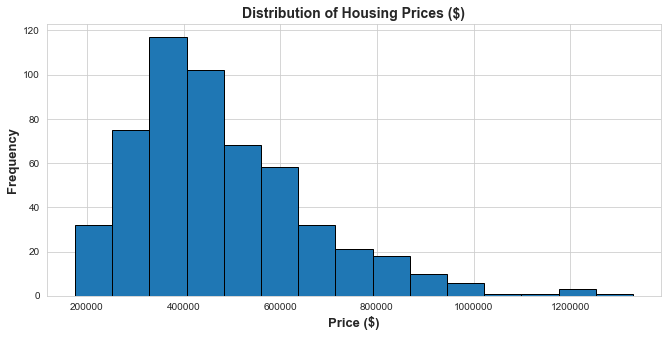

In [23]:
# create and set figure size
plt.figure(figsize=(11,5))

# plot histogram
plt.hist(housing_df['Price ($)'], bins=15, edgecolor='black')

# graph labels, title
plt.xlabel('Price ($)', fontweight='bold', fontsize=13)
plt.ylabel('Frequency', fontweight='bold', fontsize=13)
plt.title('Distribution of Housing Prices ($)', fontweight='bold', fontsize=14)
# remove scientific notation
plt.ticklabel_format(style='plain', axis='x')

# display graph
plt.show()

- The distribution of the target variable, Price ($), is skewed to the right (positive skew).
- This means that majority of the housing prices are concentrated towards the lower end of the price range (preferably around 400,000.
- There are fewer (minority) houses with high prices.

<h3>Explore <b>Target-Feature</b> Relationships</h3>

<h4>1. Correlation of various numerical features in df</h4>

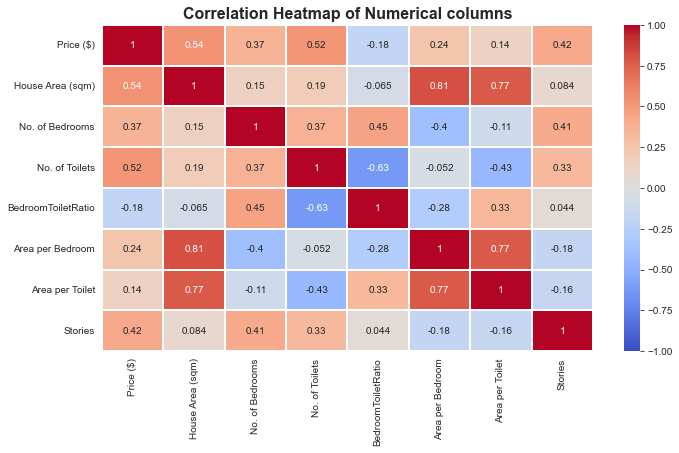

In [24]:
# define variables 
vars = ['Price ($)', 'House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'BedroomToiletRatio', 'Area per Bedroom', 'Area per Toilet', 'Stories'] 

# create and set figure size
plt.figure(figsize = (11,6))

# correlation plot
corr = housing_df[vars].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1.0, cmap='coolwarm', annot=True)

# graph title
plt.title('Correlation Heatmap of Numerical columns', fontweight='bold', fontsize=16)
# display graph
plt.show()

- Every variable is correlated with each other.
- <b>Patterns</b>: 
    - Overall, there is a mix of weak and strong correlations, but majority seems to be towards the positive side. 
- <b>Strengths</b>: 
    - Correlations between variables are mostly between weak to moderate, with only a few exceptions of strong. 
- <b>Directions</b>: 
    - There are more positive correlations than weak correlations. 
- <b>Outliers/Interesting points</b>: 
    - Stories-BedroomToiletRatio: extremely weak 
    - Stories-HouseArea: extremely weak (strange as when number of stories increases, house area is expected to increase as well).

<h4>2. Relationship between Cities and Housing Prices</h4>

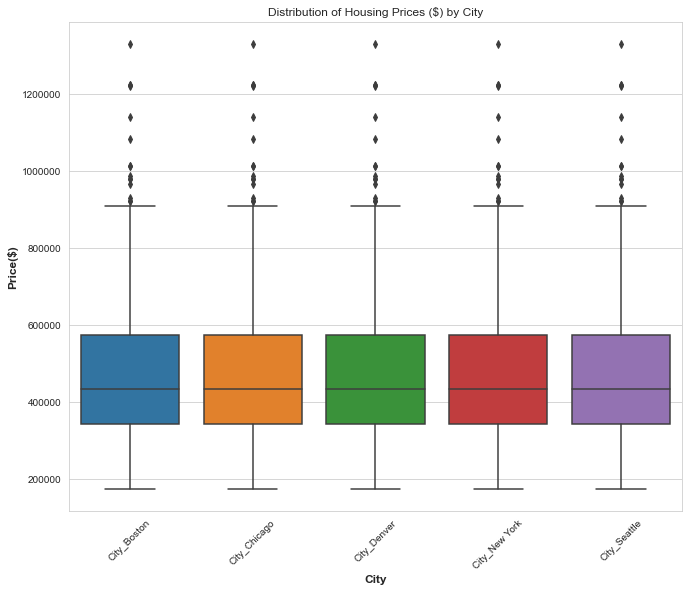

In [25]:
# define x values
cities = ['City_Boston', 'City_Chicago', 'City_Denver', 'City_New York', 'City_Seattle']

# create a new df with cities and Price
cities_df = housing_df[cities + ['Price ($)']]

# reshape the df to long format (using melt)
cities_df = cities_df.melt(id_vars='Price ($)', value_vars=cities, var_name='City')

# create and set figure size
plt.figure(figsize=(11,9))

# plot violinplot
sns.boxplot(data=cities_df, x='City', y='Price ($)')

# graph labels
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Price($)', fontsize=12, fontweight='bold')
# graph title
plt.title('Distribution of Housing Prices ($) by City')
# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
# rotate x-axis labels
plt.xticks(rotation=45)
# display graphs
plt.show()

<h4>3. Relationship between Renovation Status and Housing Prices</h4>

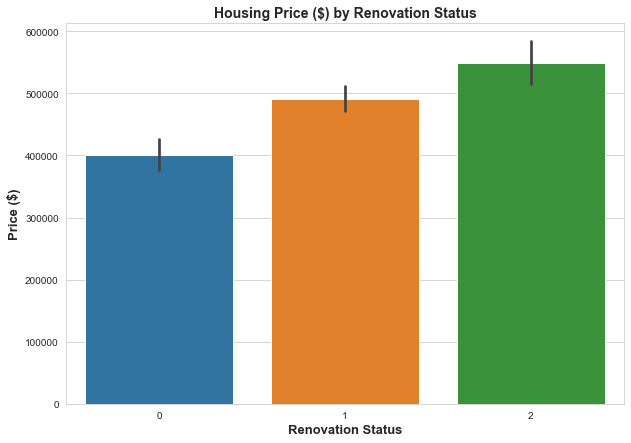

In [26]:
# create and set figure size
plt.figure(figsize=(10,7))

# plot barplot
sns.barplot(x='Renovation Status', y='Price ($)', data=housing_df)

# graph labels
plt.xlabel('Renovation Status', fontsize=13, fontweight='bold')
plt.ylabel('Price ($)', fontsize=13, fontweight='bold')
# graph title
plt.title('Housing Price ($) by Renovation Status', fontsize=14, fontweight='bold')
# display graph
plt.show()

- The bar graphs show that as quality of house increases (becomes better), the price of house will increase as well.
- This makes sense as a fully-furnished house of better quality, should logically cost higher than that of a unfurnished/semi-furnished house.

<h4>4. Relationship between No. of Bedrooms, No. of Toilets, BedroomToiletRatio against Housing Price</h4>

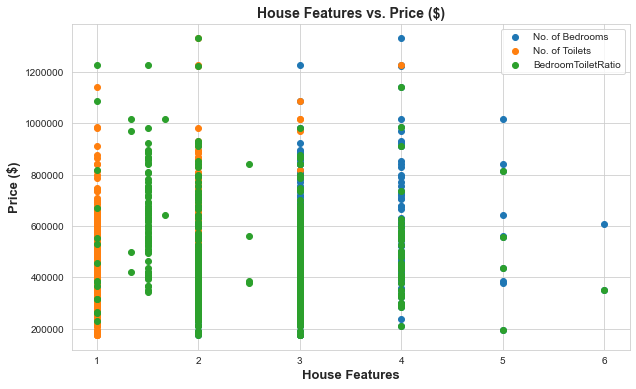

In [27]:
# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# plot No. of Bedrooms against Price
ax.scatter(housing_df['No. of Bedrooms'], housing_df['Price ($)'], label='No. of Bedrooms')

# plot No. of Toilets against Price
ax.scatter(housing_df['No. of Toilets'], housing_df['Price ($)'], label='No. of Toilets')

# plot BedroomToiletRatio against Price
ax.scatter(housing_df['BedroomToiletRatio'], housing_df['Price ($)'], label='BedroomToiletRatio')

# graph labels
plt.xlabel('House Features', fontsize=13, fontweight='bold')
plt.ylabel('Price ($)', fontsize=13, fontweight='bold')
# graph title
plt.title('House Features vs. Price ($)', fontsize=14, fontweight='bold')
# legend
plt.legend()
# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
# display graph
plt.show()

- <b>BedroomToiletRatio against Price</b> (green data points):
    - It is evident that as BedroomToiletRatio increases, price of house generally decreases. 
    - This makes sense as if there are more bedrooms than toilets, convenience of bathrooms decreases, hence valuability of house decreases.
- <b>No. of Bedrooms against Price</b> (blue data points):
    - It is seen that as number of bedrooms increases from 3 to 4, house prices generally increases. 
    - Interestingly, as number of bedrooms increases to 5 and 6 house prices show a drop in price. 
    - This observation could be due to other factors such as BedroomToiletRatio or even the city the house is located in. 
- <b>No. of Toilets against Price</b> (orange data points):
    - It is generally seen that as number of toilets increases, price of house also increases.
    - This makes sense as with more bathroom convenience, houses will be more valuable and hence more expensive.

<h1><center>Building Regression Models</center></h1>

<h2>Linear Regression</h2>

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)
    
# create Linear Regression model
LR = LinearRegression()

# fit LR model on training data
LR.fit(X_train, y_train)

# make predictions on validation data 
expected1 = y_val
predicted1 = LR.predict(X_val)

# summarize the fit of the model
# y = a1x1 + a2x2 + anxn + b 
# mean squared error (MSE)
mse1 = mean_squared_error(expected1,predicted1) # lower MSE suggests better model performance

# root mean squared error (RMSE)
rmse1 = np.sqrt(mse1)

# R square, coefficient of determination
r2_1 = r2_score(expected1, predicted1)

# mean absolute error (MAE)
mae1 = mean_absolute_error(expected1, predicted1)

# mean absolute percentage error (MAPE)
mape1 = np.mean(np.abs((expected1 - predicted1) / expected1)) * 100

print('---- Linear Regression Model Results: ----\n------------------------------------------')

# b
print('model intercept: ', LR.intercept_, '\n')
# a
print('model coefficient:\n', LR.coef_, '\n')
# mse
print('model MSE: ', mse1, '\n')
# rmse
print('model RMSE: ', rmse1, '\n')
# r2
print('model r2: ', r2_1, '\n')
# mae
print('model MAE: ', mae1, '\n')
# mape
print('model MAPE: ', mape1)

---- Linear Regression Model Results: ----
------------------------------------------
model intercept:  781670.5354002242 

model coefficient:
 [  -979.7752997     308.10182032  -5320.69506276 -36169.38965297
  -3461.29644556    -86.70679289   -285.89435852   9533.17636816
  -7518.5999848   11314.90573957  -1259.7401214  -19087.13310442
  -4529.83155869  13561.79904494] 

model MSE:  4932004658.546523 

model RMSE:  70228.23263151739 

model r2:  0.8605384036498855 

model MAE:  36354.44527428091 

model MAPE:  6.897419823104987


<h2>Decision Tree Regression</h2>

In [29]:
# Decision Tree Regression 
# Does not require feature scaling as it is not affected by scale of features
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# see which gives best results (hyperparameters)
all_depths = [2, 5, 10, 17, 25]
all_mse = []
all_rmse = []
all_r2 = []
all_mae = []
all_mape = []

print('---- Decision Tree Regressor Model Results: ----\n------------------------------------------')

for depth in all_depths: 
    # create Decision Tree Regression model
    DTR = DecisionTreeRegressor(max_depth=depth)
    
    # fit DTR model on training data
    DTR.fit(X_train, y_train)

    # make predictions on validation data 
    expected2 = y_val
    predicted2 = DTR.predict(X_val) 
    
    # mean squared error (MSE)
    mse2 = mean_squared_error(expected2,predicted2) 
    all_mse.append(mse2)

    # root mean squared error (RMSE)
    rmse2 = np.sqrt(mse2)
    all_rmse.append(rmse2)

    # R square, coefficient of determination
    r2_2 = r2_score(expected2, predicted2)
    all_r2.append(r2_2)

    # mean absolute error (MAE)
    mae2 = mean_absolute_error(expected2, predicted2)
    all_mae.append(mae2)

    # mean absolute percentage error (MAPE)
    mape2 = np.mean(np.abs((expected2 - predicted2) / expected2)) * 100
    all_mape.append(mape2)
    
    # summarize the fit of the model
    print('for max depth = {}, MSE is {:.2f}'.format(depth, mse2))
    print('for max depth = {}, RMSE is {:.2f}'.format(depth, rmse2))
    print('for max depth = {}, r2 is {:.2f}'.format(depth, r2_2))
    print('for max depth = {}, MAE is {:.2f}'.format(depth, mae2))
    print('for max depth = {}, MAPE is {:.2f}'.format(depth, mape2))
    print('\n')

---- Decision Tree Regressor Model Results: ----
------------------------------------------
for max depth = 2, MSE is 5330019916.33
for max depth = 2, RMSE is 73006.99
for max depth = 2, r2 is 0.85
for max depth = 2, MAE is 48154.05
for max depth = 2, MAPE is 10.81


for max depth = 5, MSE is 166827742.75
for max depth = 5, RMSE is 12916.18
for max depth = 5, r2 is 1.00
for max depth = 5, MAE is 7482.12
for max depth = 5, MAPE is 1.69


for max depth = 10, MSE is 128939816.77
for max depth = 10, RMSE is 11355.17
for max depth = 10, r2 is 1.00
for max depth = 10, MAE is 4633.09
for max depth = 10, MAPE is 0.97


for max depth = 17, MSE is 139913898.66
for max depth = 17, RMSE is 11828.52
for max depth = 17, r2 is 1.00
for max depth = 17, MAE is 4926.98
for max depth = 17, MAPE is 1.01


for max depth = 25, MSE is 134170473.26
for max depth = 25, RMSE is 11583.20
for max depth = 25, r2 is 1.00
for max depth = 25, MAE is 4766.68
for max depth = 25, MAPE is 0.97




- From the above evaluation metrics for each depth value, it is seen that r2 value of all is perfect 1.0 except for max_depth=2.

<h4>Compare RMSE to see which max_depth value is best</h4>

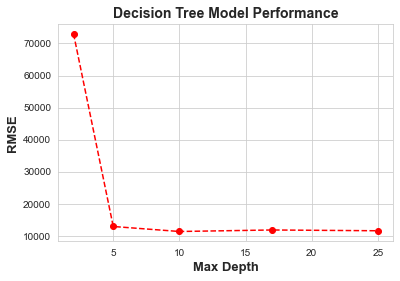

In [30]:
# plot graph
plt.plot(all_depths, all_rmse, 'ro--')
# graph labels
plt.xlabel('Max Depth', fontsize=13, fontweight='bold')
plt.ylabel('RMSE', fontsize=13, fontweight='bold')
# graph title
plt.title('Decision Tree Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since a lower RMSE indicates better model performance, with smaller prediction errors, from graph, max_depth=10 yields best results.

<h4>Compare MAPE to see which max_depth value is best</h4> 

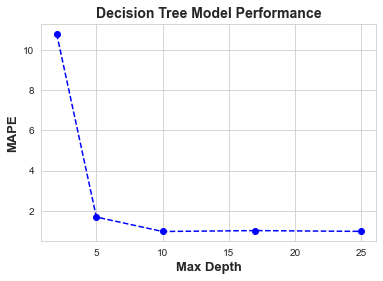

In [31]:
# plot graph
plt.plot(all_depths, all_mape, 'bo--')
# graph labels
plt.xlabel('Max Depth', fontsize=13, fontweight='bold')
plt.ylabel('MAPE', fontsize=13, fontweight='bold')
# graph title
plt.title('Decision Tree Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since lower MAPE values indicate better model performance, with smaller percentage errors, from graph, max_depth=10 yields best model performance results.

- Therefore, we choose max_depth=10!

In [32]:
# Decision Tree Regression (Final one)
# Does not require feature scaling as it is not affected by scale of features

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# create Decision Tree Regression model
DTR = DecisionTreeRegressor(max_depth=10)
    
# fit DTR model on training data
DTR.fit(X_train, y_train)

# make predictions on validation data 
expected2 = y_val
predicted2 = DTR.predict(X_val) 
    
# mean squared error (MSE)
mse2 = mean_squared_error(expected2,predicted2) 

# root mean squared error (RMSE)
rmse2 = np.sqrt(mse2)

# R square, coefficient of determination
r2_2 = r2_score(expected2, predicted2)

# mean absolute error (MAE)
mae2 = mean_absolute_error(expected2, predicted2)

# mean absolute percentage error (MAPE)
mape2 = np.mean(np.abs((expected2 - predicted2) / expected2)) * 100

print('---- Decision Tree Regressor Model Results (max_depth=10): ----\n------------------------------------------')
    
# summarize the fit of the model
# mse
print('model MSE: ', mse2, '\n')
# rmse
print('model RMSE: ', rmse2, '\n')
# r2
print('model r2: ', r2_2, '\n')
# mae
print('model MAE: ', mae2, '\n')
# mape
print('model MAPE: ', mape2)

---- Decision Tree Regressor Model Results (max_depth=10): ----
------------------------------------------
model MSE:  135704061.04580152 

model RMSE:  11649.20860169486 

model r2:  0.9961627155092311 

model MAE:  4638.435114503817 

model MAPE:  0.9227955095561841


<h2>Random Forest Regression</h2>

In [33]:
# Random Forest Regression
# Does not require feature scaling as it is based on decision trees and not scale of features
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)
    
# create Random Forest Regression model
RF = RandomForestRegressor(n_estimators=100, random_state=10)

# fit RF model on training data
RF.fit(X_train, y_train)

# make predictions on validation data 
expected3 = y_val
predicted3 = RF.predict(X_val)

print('---- Random Forest Regressor Model Results: ----\n------------------------------------------')

# summarize the fit of the model
# mean squared error (MSE)
mse3 = mean_squared_error(expected3,predicted3)

# root mean squared error (RMSE)
rmse3 = np.sqrt(mse3)

# R square, coefficient of determination
r2_3 = r2_score(expected3, predicted3)

# mean absolute error (MAE)
mae3 = mean_absolute_error(expected3, predicted3)

# mean absolute percentage error (MAPE)
mape3 = np.mean(np.abs((expected3 - predicted3) / expected3)) * 100

# mse
print('model MSE: ', mse3, '\n')
# rmse
print('model RMSE: ', rmse3, '\n')
# r2
print('model r2: ', r2_3, '\n')
# mae
print('model MAE: ', mae3, '\n')
# mape
print('model MAPE: ', mape3)

---- Random Forest Regressor Model Results: ----
------------------------------------------
model MSE:  394652629.7234902 

model RMSE:  19865.865944465902 

model r2:  0.9888404635527598 

model MAE:  5743.37816793893 

model MAPE:  0.9898212754156159


<h2>Gradient Boosting Regression</h2>

In [34]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)
    
# create Gradient Boosting Regression model
GBR = GradientBoostingRegressor(n_estimators=100, random_state=0)

# fit GBR model on training data
GBR.fit(X_train, y_train)

# make predictions on validation data 
expected4 = y_val
predicted4 = GBR.predict(X_val)

print('---- Gradient Boosting Regressor Model Results: ----\n------------------------------------------')

# summarize the fit of the model
# y = a1x1 + a2x2 + anxn + b 
# mse = np.mean((predicted-expected)**2)
mse4 = mean_squared_error(expected3,predicted3)

# root mean squared error (RMSE)
rmse4 = np.sqrt(mse4)

# R square, coefficient of determination
r2_4 = r2_score(expected4, predicted4)

# mean absolute error (MAE)
mae4 = mean_absolute_error(expected4, predicted4)

# mean absolute percentage error (MAPE)
mape4 = np.mean(np.abs((expected4 - predicted4) / expected4)) * 100

# mse
print('model MSE: ', mse4, '\n')
# rmse
print('model RMSE: ', rmse4, '\n')
# r2
print('model r2: ', r2_4, '\n')
# mae
print('model MAE: ', mae4, '\n')
# mape
print('model MAPE: ', mape4)

---- Gradient Boosting Regressor Model Results: ----
------------------------------------------
model MSE:  394652629.7234902 

model RMSE:  19865.865944465902 

model r2:  0.9966243976024831 

model MAE:  3853.9031718291294 

model MAPE:  0.7726681622577646


<h2>Neural Network Regression</h2>

In [35]:
# Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
         ('NNR', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='sgd', random_state=0, max_iter=500))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit the pipeline on the training data
NNR = pipeline.fit(X_train, y_train)

# make predictions on validation data 
expected5 = y_val
predicted5 = NNR.predict(X_val)

print('---- Neural Network Regressor Model Results: ----\n------------------------------------------')

# summarize the fit of the model
# y = a1x1 + a2x2 + anxn + b 
# mse = np.mean((predicted-expected)**2)
mse5 = mean_squared_error(expected5,predicted5)

# root mean squared error (RMSE)
rmse5 = np.sqrt(mse5)

# R square, coefficient of determination
r2_5 = r2_score(expected5, predicted5)

# mean absolute error (MAE)
mae5 = mean_absolute_error(expected5, predicted5)

# mean absolute percentage error (MAPE)
mape5 = np.mean(np.abs((expected5 - predicted5) / expected5)) * 100

# mse
print('model MSE: ', mse5, '\n')
# rmse
print('model RMSE: ', rmse5, '\n')
# r2
print('model r2: ', r2_5, '\n')
# mae
print('model MAE: ', mae5, '\n')
# mape
print('model MAPE: ', mape5)

---- Neural Network Regressor Model Results: ----
------------------------------------------
model MSE:  1856149501390.4485 

model RMSE:  1362405.7770688029 

model r2:  -51.48607624078528 

model MAE:  1349364.6258840233 

model MAPE:  314.91253750348733


<h2>Lasso</h2>

In [36]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

all_alpha = [15.0, 20.0, 25.0, 30.0, 40.0]
all_rmse_lasso = []
all_mape_lasso = []
# store all trained models
all_models_lasso = []

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
         ('lasso', Lasso(alpha=0))] # initialize with alpha=0

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

for alpha in all_alpha: # increase strength of regularization

    # set alpha value for lasso
    pipeline.set_params(lasso__alpha=alpha)

    # split the data into train and test sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
    # further split the train set into a new train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

    # fit the pipeline on the training data
    lasso = pipeline.fit(X_train, y_train)
    
    # store trained model for each alpha value
    all_models_lasso.append(lasso)

    # make predictions on validation data 
    expected6 = y_val
    predicted6 = lasso.predict(X_val)
    
    print(f'---- Lasso Regression Results, alpha={alpha}: ----\n------------------------------------------')
    
    # summarize the fit of the model
    # mean squared error (MSE)
    mse6 = mean_squared_error(expected6,predicted6)

    # root mean squared error (RMSE)
    rmse6 = np.sqrt(mse6)
    all_rmse_lasso.append(rmse6)

    # R square, coefficient of determination
    r2_6 = r2_score(expected6, predicted6)

    # mean absolute error (MAE)
    mae6 = mean_absolute_error(expected6, predicted6)

    # mean absolute percentage error (MAPE)
    mape6 = np.mean(np.abs((expected6 - predicted6) / expected6)) * 100
    all_mape_lasso.append(mape6)

    # mse
    print('model MSE: ', mse6, '\n')
    # rmse
    print('model RMSE: ', rmse6, '\n')
    # r2
    print('model r2: ', r2_6, '\n')
    # mae
    print('model MAE: ', mae6, '\n')
    # mape
    print('model MAPE: ', mape6)
    
    print('\n')

---- Lasso Regression Results, alpha=15.0: ----
------------------------------------------
model MSE:  4934600296.377191 

model RMSE:  70246.71021746991 

model r2:  0.8604650071670203 

model MAE:  36369.89457934175 

model MAPE:  6.903048020887148


---- Lasso Regression Results, alpha=20.0: ----
------------------------------------------
model MSE:  4935483401.626627 

model RMSE:  70252.99567724232 

model r2:  0.8604400357251103 

model MAE:  36374.96117959776 

model MAPE:  6.90491180872444


---- Lasso Regression Results, alpha=25.0: ----
------------------------------------------
model MSE:  4936410705.903305 

model RMSE:  70259.59511627792 

model r2:  0.8604138144735743 

model MAE:  36379.80147789548 

model MAPE:  6.906662165501057


---- Lasso Regression Results, alpha=30.0: ----
------------------------------------------
model MSE:  4937310740.723585 

model RMSE:  70265.99989129583 

model r2:  0.8603883643165902 

model MAE:  36384.78130917851 

model MAPE:  6.9084768

- From evaluation metrics above, r2 values for all regardless of alpha values seem to be very similar to each other.

<h4>Compare RMSE to see which alpha value is best</h4>

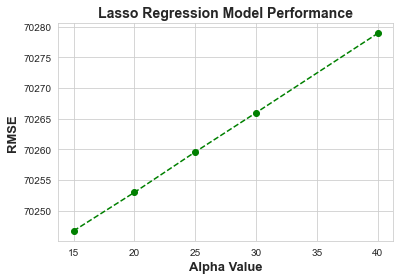

In [37]:
# plot graph
plt.plot(all_alpha, all_rmse_lasso, 'go--')
# graph labels
plt.xlabel('Alpha Value', fontsize=13, fontweight='bold')
plt.ylabel('RMSE', fontsize=13, fontweight='bold')
# graph title
plt.title('Lasso Regression Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since a lower RMSE indicates better model performance, with smaller prediction errors, from graph, alpha=15.0 yields best results.

<h4>Compare MAPE to see which alpha value is best</h4>

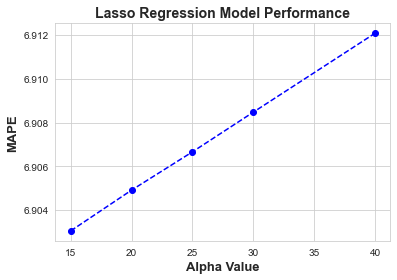

In [38]:
# plot graph
plt.plot(all_alpha, all_mape_lasso, 'bo--')
# graph labels
plt.xlabel('Alpha Value', fontsize=13, fontweight='bold')
plt.ylabel('MAPE', fontsize=13, fontweight='bold')
# graph title
plt.title('Lasso Regression Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since lower MAPE values indicate better model performance, with smaller percentage errors, from graph, alpha=15.0 yields best model performance results.

- Therefore, we choose alpha=15.0!

In [39]:
# Lasso (Final) 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
        ('lasso', Lasso(alpha=15.0))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit the pipeline on the training data
lasso = pipeline.fit(X_train, y_train)

# make predictions on validation data 
expected6 = y_val
predicted6 = lasso.predict(X_val)
    
print(f'---- Lasso Regression Results, alpha=15.0: ----\n------------------------------------------')
    
# summarize the fit of the model
# mean squared error (MSE)
mse6 = mean_squared_error(expected6,predicted6)

# root mean squared error (RMSE)
rmse6 = np.sqrt(mse6)

# R square, coefficient of determination
r2_6 = r2_score(expected6, predicted6)

# mean absolute error (MAE)
mae6 = mean_absolute_error(expected6, predicted6)

# mean absolute percentage error (MAPE)
mape6 = np.mean(np.abs((expected6 - predicted6) / expected6)) * 100

# mse
print('model MSE: ', mse6, '\n')
# rmse
print('model RMSE: ', rmse6, '\n')
# r2
print('model r2: ', r2_6, '\n')
# mae
print('model MAE: ', mae6, '\n')
# mape
print('model MAPE: ', mape6)

---- Lasso Regression Results, alpha=15.0: ----
------------------------------------------
model MSE:  4934600296.377191 

model RMSE:  70246.71021746991 

model r2:  0.8604650071670203 

model MAE:  36369.89457934175 

model MAPE:  6.903048020887148


<h3>Feature Selection with Lasso</h3>

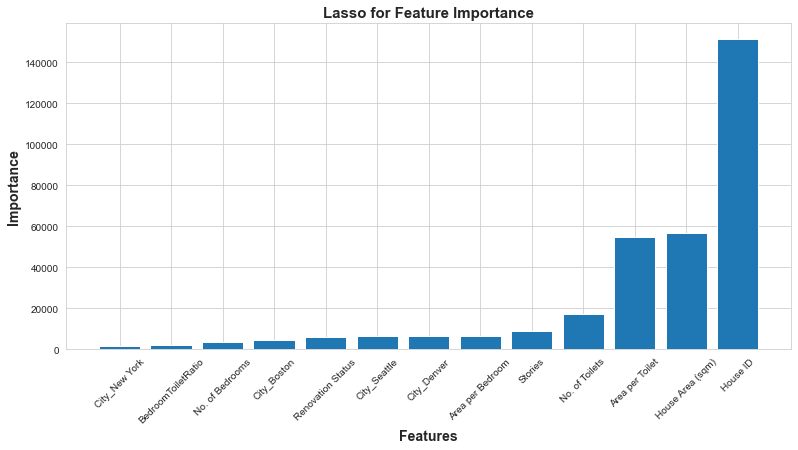

In [40]:
# fit lasso
lasso_model = pipeline.named_steps['lasso']

# get feature importance
feature_impt = np.abs(lasso_model.coef_)

# get feature indices (feature importance greater than 0.01)
feature_ind = np.where(feature_impt > 0.01)[0]

# get feature names
feature_names = X.columns[feature_ind]

# sort feature importance and corr. feature names in descending order
# sort feature indices
sortedInd = np.argsort(feature_impt[feature_ind])
# sort feature names
sortedNames = feature_names[sortedInd]
# sort feature importance
sortedImpt = feature_impt[feature_ind][sortedInd]

# create and set figure size
plt.figure(figsize=(13,6))

# plot bar graph
plt.bar(sortedNames, sortedImpt)

# graph labels
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
# graph title
plt.title('Lasso for Feature Importance', fontsize=15, fontweight='bold')
# rotate x-axis labels
plt.xticks(rotation=45)
# display graph
plt.show()

- As shown above, 'City_Chicago' is not seen to have any impact on model prediction.
- No. of Toilets heavily impacts model prediction performance. 

<h2>Ridge</h2>

In [41]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

all_alpha_ridge = [0.001, 0.01, 0.1, 1.0, 10.0]
all_rmse_ridge = []
all_mape_ridge = []
all_models_ridge = []

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
        ('ridge', Ridge(max_iter=10000))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

for alpha in all_alpha_ridge:
    
    # set alpha value for ridge
    pipeline.set_params(ridge__alpha=alpha)

    # split the data into train and test sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
    # further split the train set into a new train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

    # fit the pipeline on the training data
    ridge = pipeline.fit(X_train, y_train)
    
    # store trained model for each alpha value
    all_models_ridge.append(ridge)

    # make predictions on validation data 
    expected7 = y_val
    predicted7 = ridge.predict(X_val)

    print(f'---- Ridge Regression Results, alpha={alpha}: ----\n------------------------------------------')
    
    # summarize the fit of the model
    # mean squared error (MSE)
    mse7 = mean_squared_error(expected7,predicted7)

    # root mean squared error (RMSE)
    rmse7 = np.sqrt(mse7)
    all_rmse_ridge.append(rmse7)

    # R square, coefficient of determination
    r2_7 = r2_score(expected7, predicted7)

    # mean absolute error (MAE)
    mae7 = mean_absolute_error(expected7, predicted7)

    # mean absolute percentage error (MAPE)
    mape7 = np.mean(np.abs((expected7 - predicted7) / expected7)) * 100
    all_mape_ridge.append(mape7)

    # mse
    print('model MSE: ', mse7, '\n')
    # rmse
    print('model RMSE: ', rmse7, '\n')
    # r2
    print('model r2: ', r2_7, '\n')
    # mae
    print('model MAE: ', mae7, '\n')
    # mape
    print('model MAPE: ', mape7)
    
    print('\n')

---- Ridge Regression Results, alpha=0.001: ----
------------------------------------------
model MSE:  4932077754.892947 

model RMSE:  70228.75304953767 

model r2:  0.8605363367148631 

model MAE:  36354.568991287306 

model MAPE:  6.897434985017743


---- Ridge Regression Results, alpha=0.01: ----
------------------------------------------
model MSE:  4932735139.400964 

model RMSE:  70233.43320243547 

model r2:  0.8605177479463498 

model MAE:  36355.67640680881 

model MAPE:  6.897569677688577


---- Ridge Regression Results, alpha=0.1: ----
------------------------------------------
model MSE:  4939261337.876593 

model RMSE:  70279.87861313217 

model r2:  0.8603332075574976 

model MAE:  36366.1633993774 

model MAPE:  6.8987450936225905


---- Ridge Regression Results, alpha=1.0: ----
------------------------------------------
model MSE:  4999981621.315992 

model RMSE:  70710.54816161442 

model r2:  0.8586162287130807 

model MAE:  36421.295292539806 

model MAPE:  6.89604

- From evaluation metrics above, r2 value is highest for alpha=0.001

<h4>Compare RMSE to see which alpha value is best</h4>

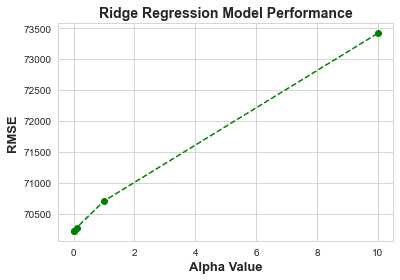

In [42]:
# plot graph
plt.plot(all_alpha_ridge, all_rmse_ridge, 'go--')
# graph labels
plt.xlabel('Alpha Value', fontsize=13, fontweight='bold')
plt.ylabel('RMSE', fontsize=13, fontweight='bold')
# graph title
plt.title('Ridge Regression Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since a lower RMSE indicates better model performance, with smaller prediction errors, from graph, alpha values very close to zero (0.001) yields best results.

<h4>Compare MAPE to see which alpha value is best</h4>

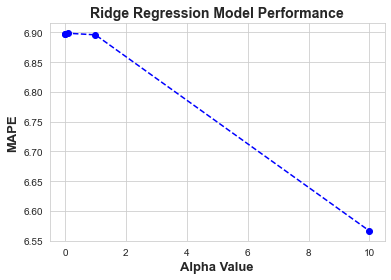

In [43]:
# plot graph
plt.plot(all_alpha_ridge, all_mape_ridge, 'bo--')
# graph labels
plt.xlabel('Alpha Value', fontsize=13, fontweight='bold')
plt.ylabel('MAPE', fontsize=13, fontweight='bold')
# graph title
plt.title('Ridge Regression Model Performance', fontsize=14, fontweight='bold')
# display graph
plt.show()

- Since lower MAPE values indicate better model performance, with smaller percentage errors, from graph, alpha=10.0 yields best model performance results.

- Interestingly, the graphs show conflicting results where opposite ends of range of alpha values perform well and poor in RMSE and MAPE. 
- To choose which alpha value I should use for Ridge, I will pick alpha=0.1. It has a decent r2 value, and RMSE and MAPE values are not too bad. 

In [44]:
# Ridge (Final)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
        ('ridge', Ridge(alpha=0.1, max_iter=10000))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit the pipeline on the training data
ridge = pipeline.fit(X_train, y_train)

# make predictions on validation data 
expected7 = y_val
predicted7 = ridge.predict(X_val)

print(f'---- Ridge Regression Results, alpha=0.1: ----\n------------------------------------------')
    
# summarize the fit of the model
# mean squared error (MSE)
mse7 = mean_squared_error(expected7,predicted7)

# root mean squared error (RMSE)
rmse7 = np.sqrt(mse7)

# R square, coefficient of determination
r2_7 = r2_score(expected7, predicted7)

# mean absolute error (MAE)
mae7 = mean_absolute_error(expected7, predicted7)

# mean absolute percentage error (MAPE)
mape7 = np.mean(np.abs((expected7 - predicted7) / expected7)) * 100

# mse
print('model MSE: ', mse7, '\n')
# rmse
print('model RMSE: ', rmse7, '\n')
# r2
print('model r2: ', r2_7, '\n')
# mae
print('model MAE: ', mae7, '\n')
# mape
print('model MAPE: ', mape7)

---- Ridge Regression Results, alpha=0.1: ----
------------------------------------------
model MSE:  4939261337.876593 

model RMSE:  70279.87861313217 

model r2:  0.8603332075574976 

model MAE:  36366.1633993774 

model MAPE:  6.8987450936225905


<h1><center> Comparing Models Performances and Choosing 'The One'!</center></h1>

<h2>1. Compare Evaluation Metrics of All Models</h2>

In [45]:
# create a new dataframe for evaluation metrics of all models
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'r2', 'MAE', 'MAPE'])

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Linear Regression'],
                                      'MSE': [mse1],
                                      'RMSE': [rmse1],
                                      'r2': [r2_1],
                                      'MAE': [mae1],
                                      'MAPE': [mape1]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Decision Tree Regression'],
                                      'MSE': [mse2],
                                      'RMSE': [rmse2],
                                      'r2': [r2_2],
                                      'MAE': [mae2],
                                      'MAPE': [mape2]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Random Forest Regression'],
                                      'MSE': [mse3],
                                      'RMSE': [rmse3],
                                      'r2': [r2_3],
                                      'MAE': [mae3],
                                      'MAPE': [mape3]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Gradient Boosting Regression'],
                                      'MSE': [mse4],
                                      'RMSE': [rmse4],
                                      'r2': [r2_4],
                                      'MAE': [mae4],
                                      'MAPE': [mape4]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Neural Network Regression'],
                                      'MSE': [mse5],
                                      'RMSE': [rmse5],
                                      'r2': [r2_5],
                                      'MAE': [mae5],
                                      'MAPE': [mape5]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Lasso Regression'],
                                      'MSE': [mse6],
                                      'RMSE': [rmse6],
                                      'r2': [r2_6],
                                      'MAE': [mae6],
                                      'MAPE': [mape6]})],
                       ignore_index=True)

metrics_df = pd.concat([metrics_df,
                        pd.DataFrame({'Model': ['Ridge Regression'],
                                      'MSE': [mse7],
                                      'RMSE': [rmse7],
                                      'r2': [r2_7],
                                      'MAE': [mae7],
                                      'MAPE': [mape7]})],
                       ignore_index=True)

metrics_df.set_index('Model', inplace=True)

metrics_df

,MSE,RMSE,r2,MAE,MAPE
Model,,,,,
Linear Regression,4932004658.546523,70228.232632,0.860538,36354.445274,6.89742
Decision Tree Regression,135704061.045802,11649.208602,0.996163,4638.435115,0.922796
Random Forest Regression,394652629.72349,19865.865944,0.98884,5743.378168,0.989821
Gradient Boosting Regression,394652629.72349,19865.865944,0.996624,3853.903172,0.772668
Neural Network Regression,1856149501390.448486,1362405.777069,-51.486076,1349364.625884,314.912538
Lasso Regression,4934600296.377191,70246.710217,0.860465,36369.894579,6.903048
Ridge Regression,4939261337.876593,70279.878613,0.860333,36366.163399,6.898745


- From the dataframe, it is evident that Gradient Boosting Regression model has the best model performance.
    - It has the lowest MAPE, MAE, RMSE, MSE values, and the third highest r2 value, as compared to the other models.
- Another good model suitable for this analysis would be Decision Tree Regression or Random Forest Regression. 

<h2>2. Residual Analysis</h2>

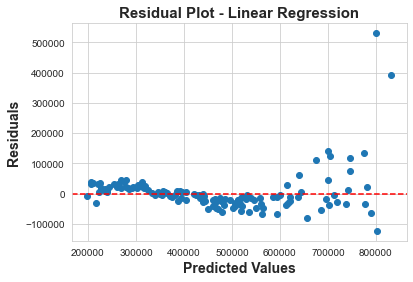

In [46]:
# calculate residuals
residuals1 = expected1 - predicted1

# plot scatter plot for Linear Regression
plt.scatter(predicted1, residuals1)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Linear Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for linear regression, 
    - The data points are above the residual=0 line near [200000,350000]
    - Then, more data points are below the residual=0 line at [350000,600000]
    - Data points are lastly above the residual=0 line again at [600000,800000]
- The data points form a U-shaped pattern. 
- Therefore, this shows that the linear regression model is not a very good fit for the data, and will have errors. 

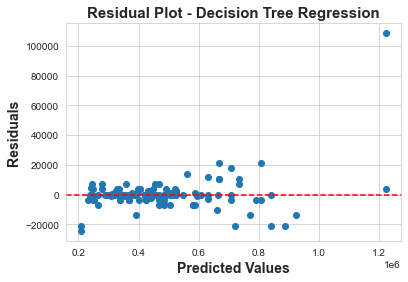

In [47]:
# calculate residuals
residuals2 = expected2 - predicted2

# plot scatter plot for Decision Tree Regression
plt.scatter(predicted2, residuals2)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Decision Tree Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for decision tree regression, 
    - The data points are randomly scattered around the residual=0 line, with no distinct pattern/shape. 
- Therefore, this shows that the decision tree regression model is an appropriate fit for the data.

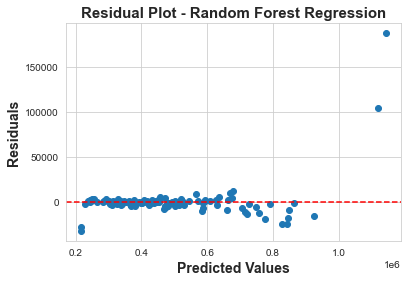

In [48]:
# calculate residuals
residuals3 = expected3 - predicted3

# plot scatter plot for Random Forest Regression
plt.scatter(predicted3, residuals3)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Random Forest Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for random forest regression, 
    - The data points are above and below the residual=0 line near [200000,700000]
    - Then, more data points are below the residual=0 line at [700000,900000]
    - Data points are lastly above the residual=0 line again at 1000000
- The data points form a somewhat U-shaped pattern. 
- Therefore, this shows that the random forest regression model is decent but still not a very good fit for the data. 

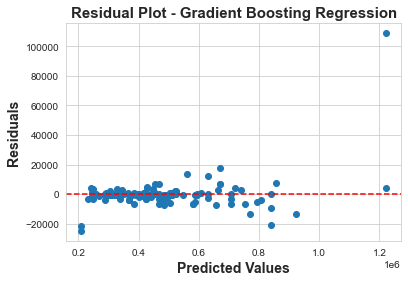

In [49]:
# calculate residuals
residuals4 = expected4 - predicted4

# plot scatter plot for Gradient Boosting Regression
plt.scatter(predicted4, residuals4)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Gradient Boosting Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for gradient boosting regression, 
    - The data points are randomly scattered around the residual=0 line, with no distinct pattern/shape. 
- Therefore, this shows that the gradient boosting regression model is an appropriate fit for the data.

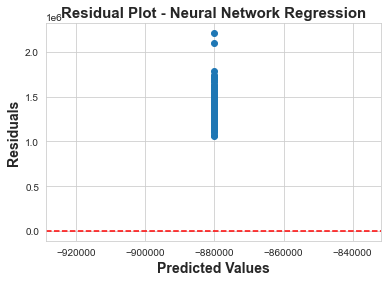

In [50]:
# calculate residuals
residuals5 = expected5 - predicted5

# plot scatter plot for Neural Network Regression
plt.scatter(predicted5, residuals5)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Neural Network Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

The predicted values for neural network regression model are consistently underestimating the actual values by a certain amount.

The vertical line at x = -880000 suggests neural network model consistently predicts values that are lower than the actual values by approximately 880000 units. 
This indicates a bias in the predictions, where the model tends to underestimate the target variable.

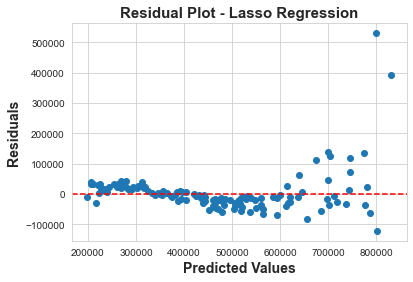

In [51]:
# calculate residuals
residuals6 = expected6 - predicted6

# plot scatter plot for Lasso Regression
plt.scatter(predicted6, residuals6)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Lasso Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for lasso regression, 
    - The data points are above the residual=0 line near [200000,400000]
    - Then, more data points are below the residual=0 line at [400000,600000]
    - Data points are lastly above and below the residual=0 line again at [600000,800000]
- The data points form a U-shaped pattern. 
- Therefore, this shows that the lasso regression model is not the best fit for the data. 

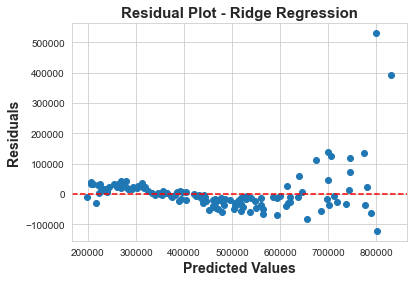

In [52]:
# calculate residuals
residuals7 = expected7 - predicted7

# plot scatter plot for Ridge Regression
plt.scatter(predicted7, residuals7)

# plot baseline: residuals are 0  (no error)
plt.axhline(y=0, color='r', linestyle='--')

# graph labels
plt.xlabel('Predicted Values',  fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
# graph title
plt.title('Residual Plot - Ridge Regression',  fontsize=15, fontweight='bold')
# display graph
plt.show()

- In the residual plot for ridge regression, 
    - The data points are above the residual=0 line near [200000,400000]
    - Then, more data points are below the residual=0 line at [400000,600000]
    - Data points are lastly above and below the residual=0 line again at [600000,800000]
- The data points form a U-shaped pattern. 
- Therefore, this shows that the ridge regression model is not the best fit for the data. 

<h2>Best Model</h2>
<h3>Since Gradient Boosting Regression is a best fit for data, with good evaluation metric values, I chose it as the best model.</h3>

<h1><center>Model Improvement and Tuning Hyperparameters on Gradient Boosting Regression</center></h1>

<h3>Perform GridSearchCV</h3>
<h4>To search for the best combination of hyperparameters for Gradient Boosting Regression model</h4>

In [57]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)
    
# create Gradient Boosting Regression model
GBR = GradientBoostingRegressor(random_state=0)

# define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.05, 0.2, 0.01],
    'max_depth': [5, 10, 15, 20]
}
    
# create GridSearchCV
grid_search = GridSearchCV(GBR, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit gridsearch on training data
grid_search.fit(X_train, y_train)

# best model, best params
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# make predictions on validation data 
expected4 = y_val
predicted4 = best_model.predict(X_val)

# summarize the fit of the model
# mean squared error (MSE)
mse4 = mean_squared_error(expected3,predicted3)

# root mean squared error (RMSE)
rmse4 = np.sqrt(mse4)

# R square, coefficient of determination
r2_4 = r2_score(expected4, predicted4)

# mean absolute error (MAE)
mae4 = mean_absolute_error(expected4, predicted4)

# mean absolute percentage error (MAPE)
mape4 = np.mean(np.abs((expected4 - predicted4) / expected4)) * 100

print('---- Gradient Boosting Regressor Model GridSearchCV Results: ----\n------------------------------------------')
# best parameters
print('Best Parameters: ', best_params)
# mse
print('model MSE: ', mse4, '\n')
# rmse
print('model RMSE: ', rmse4, '\n')
# r2
print('model r2: ', r2_4, '\n')
# mae
print('model MAE: ', mae4, '\n')
# mape
print('model MAPE: ', mape4)

---- Gradient Boosting Regressor Model GridSearchCV Results: ----
------------------------------------------
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
model MSE:  394652629.7234902 

model RMSE:  19865.865944465902 

model r2:  0.9965846405695755 

model MAE:  3816.645665597704 

model MAPE:  0.733543667455614


<h1><center>Using the Best Model on Testing Set</center></h1>

In [54]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define X and y for easy identification
# features
X = housing_df.drop('Price ($)', axis=1)
# target variable
y = housing_df['Price ($)']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
# create Gradient Boosting Regression model
GBR = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=5, random_state=0)

# fit GBR model on training data
GBR.fit(X_train, y_train)

# make predictions on testing data 
expected = y_test
predicted = GBR.predict(X_test)

# summarize the fit of the model
# mean squared error (MSE)
mse = mean_squared_error(expected,predicted)

# root mean squared error (RMSE)
rmse = np.sqrt(mse)

# R square, coefficient of determination
r2 = r2_score(expected, predicted)

# mean absolute error (MAE)
mae = mean_absolute_error(expected, predicted)

# mean absolute percentage error (MAPE)
mape = np.mean(np.abs((expected - predicted) / expected)) * 100

print('---- Gradient Boosting Regressor Model Results on Testing Data: ----\n------------------------------------------')
# mse
print('model MSE: ', mse, '\n')
# rmse
print('model RMSE: ', rmse, '\n')
# r2
print('model r2: ', r2, '\n')
# mae
print('model MAE: ', mae, '\n')
# mape
print('model MAPE: ', mape)

---- Gradient Boosting Regressor Model Results on Testing Data: ----
------------------------------------------
model MSE:  482020517.5314432 

model RMSE:  21954.965669101904 

model r2:  0.9873983391799708 

model MAE:  4861.765779147207 

model MAPE:  0.7240203126666186


<h2>Creating a Dummy Baseline</h2>

In [55]:
# import dummy baseline
from sklearn.dummy import DummyRegressor

# create a dummy baseline model
dummy = DummyRegressor(strategy='mean')

# fit dummy model on training data
dummy.fit(X_train, y_train)

# make predictions on testing data 
expected = y_test
dummyPredicted = dummy.predict(X_test)

# summarize the fit of the model
# mean squared error (MSE)
mse0 = mean_squared_error(expected, dummyPredicted)

# root mean squared error (RMSE)
rmse0 = np.sqrt(mse0)

# R square, coefficient of determination
r2_0 = r2_score(expected, dummyPredicted)

# mean absolute error (MAE)
mae0 = mean_absolute_error(expected, dummyPredicted)

# mean absolute percentage error (MAPE)
mape0 = np.mean(np.abs((expected - dummyPredicted) / expected)) * 100

print('---- Dummy Baseline Model Results on Testing Data: ----\n------------------------------------------')
# mse
print('model MSE: ', mse0, '\n')
# rmse
print('model RMSE: ', rmse0, '\n')
# r2
print('model r2: ', r2_0, '\n')
# mae
print('model MAE: ', mae0, '\n')
# mape
print('model MAPE: ', mape0)

---- Dummy Baseline Model Results on Testing Data: ----
------------------------------------------
model MSE:  38374034349.65022 

model RMSE:  195892.91551674405 

model r2:  -0.003228177188320691 

model MAE:  149699.2350952501 

model MAPE:  34.782949348528476


<h2> Compare Model Performance to Dummy Baseline</h2>

In [56]:
# import
from sklearn.model_selection import KFold, cross_val_score

# create the K-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=0)

# perform cross-validation on GBR and dummy model
cvGBR = cross_val_score(GBR, X, y, cv=kf, scoring='neg_mean_squared_error')
cvDummy = cross_val_score(dummy, X, y, cv=kf, scoring='neg_mean_squared_error')

# convert the negative mean squared error scores to positive
mse_scores1 = -cvGBR
mse_scores2 = -cvDummy

# calculate mean and std of scores
mean_mse1 = np.mean(mse_scores1)
mean_mse2 = np.mean(mse_scores2)
std_mse1 = np.std(mse_scores1)
std_mse2 = np.std(mse_scores2)

# cross validation results
print('K-fold Cross-Validation Results for GBR:\n')
print('Mean MSE: ', mean_mse1)
print('STD MSE: ', std_mse1, '\n')

print('----------------------------------------------')

print('K-fold Cross-Validation Results for Dummy Model:\n')
print('Mean MSE: ', mean_mse2)
print('STD MSE: ', std_mse2)

K-fold Cross-Validation Results for GBR:

Mean MSE:  136055573.60111445
STD MSE:  129916954.52360214 

----------------------------------------------
K-fold Cross-Validation Results for Dummy Model:

Mean MSE:  34951875585.05389
STD MSE:  8527294632.129402
